# What is computer vision? 

It is a field that deals with how computers can see and understand images (since computers do not see images the same way humans do)


# Preprocessing:

image manipulations that computer scientists do, so that a computer can better understand an image they are given.



### What are some examples of when this is applicable? 



first step in preprocessing is to display the image you want to manipulate! But before you can do that, you need to import various computer vision python libraries.

###### as a side note, for any cells with code, # means that whatever is written after is a comment so when you run your code, it will not be affected by the comments 



In [16]:
# press the run button so all these libraries will be imported into your code and will allow you to access 
# different functions already built into python libraries by other people

import numpy as np
import cv2 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

now time to find an image! go online and save any image you want ( ex: a flower, a dog, anything your imagination can think of that is appropriate :) ) to a folder on your H drive where you will easily be able to access it

In [17]:
img = plt.imread('C:/Users/sakhi/Documents/others/ehths.jpg')

#img = plt.imread('') #enter your image location in the ('') use my example above as a guide
print(img)

# the two lines above first find where the image is located on your computer and then saves it to the variable
# img so anytime we want to manipulate the image, we will be using the name img. then, it prints the image.

# when you ran this block of code did you notice anything weird? the image that it printed was in fact not an image 
# but a series of matrices of images. this is what happens when a computer prints an image. it simply sees
# it as a series of numbers (which represent pixel points)

[[[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [224 224 224]
  [224 224 224]
  [224 224 224]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [224 224 224]
  [224 224 224]
  [224 224 224]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [224 224 224]
  [224 224 224]
  [224 224 224]]

 ...

 [[ 89  82  72]
  [ 94  88  76]
  [102  94  81]
  ...
  [ 95  87  74]
  [ 91  83  70]
  [ 93  85  72]]

 [[ 92  85  75]
  [101  95  83]
  [103  95  82]
  ...
  [ 94  86  73]
  [ 91  83  70]
  [ 93  85  72]]

 [[ 83  76  66]
  [ 93  87  75]
  [ 94  86  73]
  ...
  [ 94  86  73]
  [ 92  84  71]
  [ 93  85  72]]]


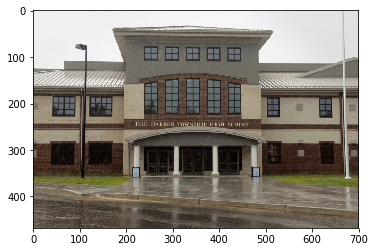

In [18]:
# now to actually print the image as an image, run the following code

plt.imshow(img)
plt.show()

##### what are some ways you think we can manipulate your image?


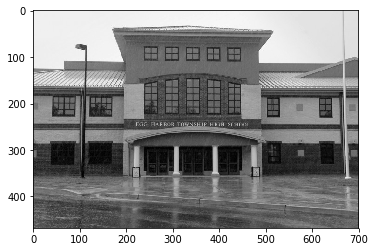

In [19]:
# Grey Scale! 

grey_img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img, cmap='gray')

We just changed your image to gray scale! What exactly does this mean? And what are the applications of this? 

In [30]:
cv2.imwrite( "grey.png", grey_img )

# we are saving the grey scale image as a matrix

True

##### The grayscale image has been stored as a 2-D array (a matrix), whose entries give intensity values (the level of "grayness" at each pixel). Let's check the size of this matrix.

In [31]:
[h, w] = np.shape(grey_img)
print('The width of the image is:', w, '\nThe height of the image is:', h)

The width of the image is: 700 
The height of the image is: 468


###### Let's practice thinking about this image as a matrix. First, extract one row of the matrix. Let's choose a row near the middle of the image.

In [32]:
row_num = 350
img_row = grey_img[350,:]

# for row_num, pick a value that is approximately half of your width value
# img_row = grey_img[row_num,:]
# : means that it will start at the value you entered and continue until the end

talk abt whats below

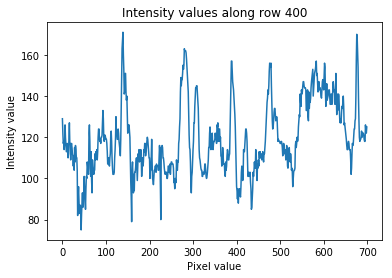

In [33]:
plt.plot(img_row)
plt.title('Intensity values along row ' + str(row_num))
plt.xlabel('Pixel value')
plt.ylabel('Intensity value')
plt.show()

The plot above displays the pixel values for your image at the row you picked. An intensity value of 0 is white while an intensity value of 200 is black. Since we coverted our image to grey scale all the pixels in the image are a mix of white and black. 

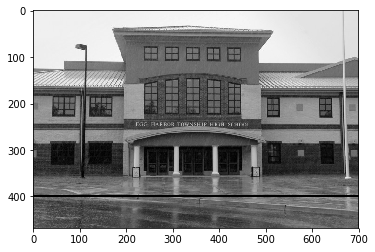

In [34]:
row_missing = grey_img.copy()
row_missing[row_num-2:row_num+2,:] = 0
plt.imshow(row_missing,cmap='gray')
plt.show()

We added a black horizontal line to our image. Can anyone think of why this might be helpful? 

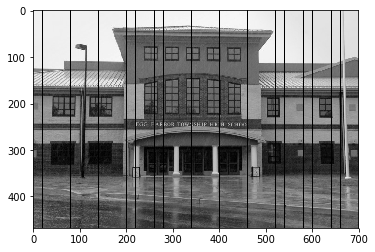

In [35]:
stripes_img = grey_img.copy()
for i in range(0, w, 20):
    stripes_img[:,i]=0
cv2.imwrite( "stripes.png", stripes_img )
plt.imshow(stripes_img,cmap='gray')
plt.show()

In [36]:
np.argmax(img_row)

139

figure out what this means 

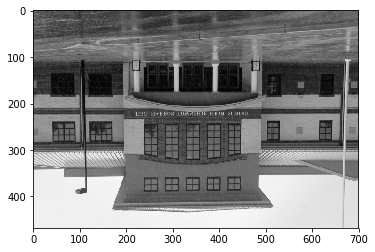

In [37]:
flipped_img = np.flipud(grey_img)
plt.imshow(flipped_img,cmap='gray')
plt.show()

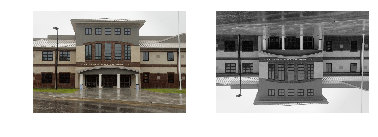

In [38]:
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(flipped_img,cmap='gray')
plt.axis('off')
plt.show()

Above, we simply are showing our original image to the flipped image in grey scale

##### Now we will be adding various filters to your images. 

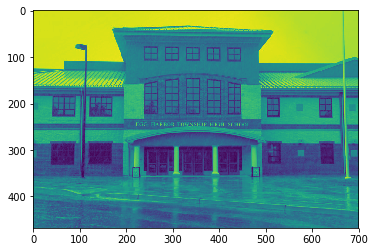

In [25]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

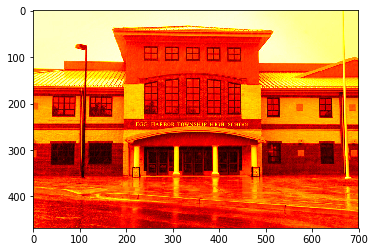

In [28]:
newimg = plt.imshow(lum_img, cmap="hot")

# "hot" color map

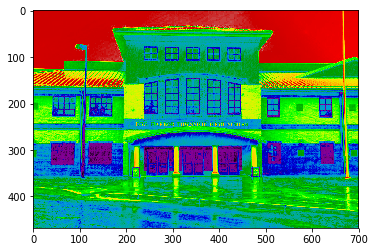

In [27]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

Different filters can be used on images to illuminate cretain aspects of them. Another way to do this through thresolding. Thresholding 

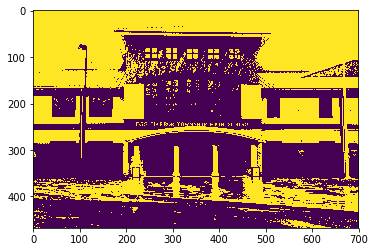

In [52]:
threshold_value =  110
ret,thresh1 = cv2.threshold(grey_img,threshold_value,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()

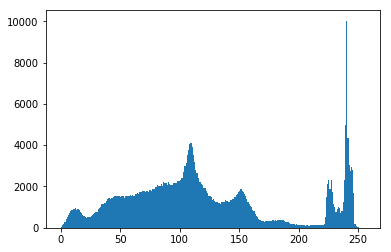

In [51]:
plt.hist(grey_img.ravel(),256,[0,256]); plt.show()

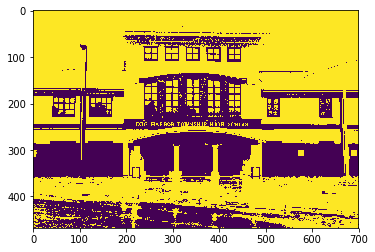

In [53]:
threshold_value =  #pick the best value based on the chart above
ret,thresh1 = cv2.threshold(grey_img,threshold_value,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()

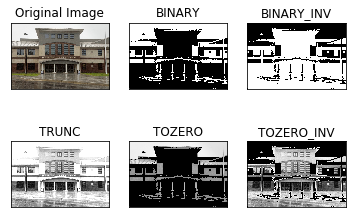

In [48]:
#thresholding 

ret,thresh1 = cv2.threshold(grey_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(grey_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(grey_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(grey_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(grey_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
   plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])

plt.show()

explain what is being done above

applications of thresholding 

In [1]:
blur = cv2.blur(img,(9,9))
plt.imshow(blur)
plt.show()

In [ ]:
blur = cv2.blur(grey_img,(9,9))
plt.imshow(blur)
plt.show()

multiple manipulations to a single image 

img = cv2.imread('cameraman.png',1)
plt.imshow(img)
plt.show()

the original blur used a larger kernel aka it made a more pronounced blur. the blur we just applied above was less pronounced but yu can still tell. the one above is denoising (applications of that) 

In [3]:
# https://en.wikipedia.org/wiki/Kernel_(image_processing)

use the link above to play around with different types of blurs 
Use filters to shift the image to the right by 10 pixels.

talk abt german traffic data set using a ppt 